In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Extraindo do csv
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vStdomFSGqvRRfZ1exTTo-ETSB62D5jzeIcy16jKesOSIXOF639-zl8mfhGWstjwzhKYUEVKH--okzQ/pub?output=csv')

display(df)

,Data,Consumo_Energetico,Qualidade_Ar,Residuos_Solidos,Uso_Recursos
0,2024-01-31,1500,80,25,500
1,2024-02-29,1600,85,28,520
2,2024-03-31,1450,90,30,510
3,2024-04-30,1550,88,35,530
4,2024-05-31,1700,82,40,540
5,2024-06-30,1800,78,45,550
6,2024-07-31,1750,85,42,545
7,2024-08-31,1600,80,38,560
8,2024-09-30,1500,75,35,555
9,2024-10-31,1650,70,40,550


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                12 non-null     object
 1   Consumo_Energetico  12 non-null     int64 
 2   Qualidade_Ar        12 non-null     int64 
 3   Residuos_Solidos    12 non-null     int64 
 4   Uso_Recursos        12 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 612.0+ bytes


In [ ]:
for coluna in ['Consumo_Energetico','Qualidade_Ar',"Residuos_Solidos","Uso_Recursos"]:

    df[coluna] = pd.to_numeric(df[coluna], errors="coerce")  # Converte valores inválidos para NaN

    if df[coluna].isna().all():  # Se a coluna inteira for NaN
        df[coluna] = 0
    else:
        df[coluna] = df[coluna].fillna(df[coluna].mean())  # Preencher NaN com a média

    df[coluna] = df[coluna].astype(float)  # Garantir que a coluna continue numérica

df['Data'] = df['Data'].astype('datetime64[ns]') #Alterando o tipo de dados da coluna data

#Exibindo o DataFrame limpo
print("\nDataFrame após limpeza:")
display(df)
df.info() #verificando se foi certo


DataFrame após limpeza:


,Data,Consumo_Energetico,Qualidade_Ar,Residuos_Solidos,Uso_Recursos
0,2024-01-31,1500.0,80.0,25.0,500.0
1,2024-02-29,1600.0,85.0,28.0,520.0
2,2024-03-31,1450.0,90.0,30.0,510.0
3,2024-04-30,1550.0,88.0,35.0,530.0
4,2024-05-31,1700.0,82.0,40.0,540.0
5,2024-06-30,1800.0,78.0,45.0,550.0
6,2024-07-31,1750.0,85.0,42.0,545.0
7,2024-08-31,1600.0,80.0,38.0,560.0
8,2024-09-30,1500.0,75.0,35.0,555.0
9,2024-10-31,1650.0,70.0,40.0,550.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                12 non-null     datetime64[ns]
 1   Consumo_Energetico  12 non-null     float64       
 2   Qualidade_Ar        12 non-null     float64       
 3   Residuos_Solidos    12 non-null     float64       
 4   Uso_Recursos        12 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 612.0 bytes



Estatísticas Descritivas:


,Consumo_Energetico,Qualidade_Ar,Residuos_Solidos,Uso_Recursos
count,12.00,12.00,12.00,12.00
mean,1612.50,78.17,37.75,534.58
std,108.97,9.20,7.48,18.64
min,1450.00,60.00,25.00,500.00
25%,1537.50,73.75,33.75,523.75
50%,1600.00,80.00,39.00,535.00
75%,1700.00,85.00,42.75,550.00
max,1800.00,90.00,50.00,560.00



Matriz de Correlação:


,Consumo_Energetico,Qualidade_Ar,Residuos_Solidos,Uso_Recursos
Consumo_Energetico,1.00,-0.21,0.68,0.47
Qualidade_Ar,-0.21,1.00,-0.66,-0.17
Residuos_Solidos,0.68,-0.66,1.00,0.51
Uso_Recursos,0.47,-0.17,0.51,1.00


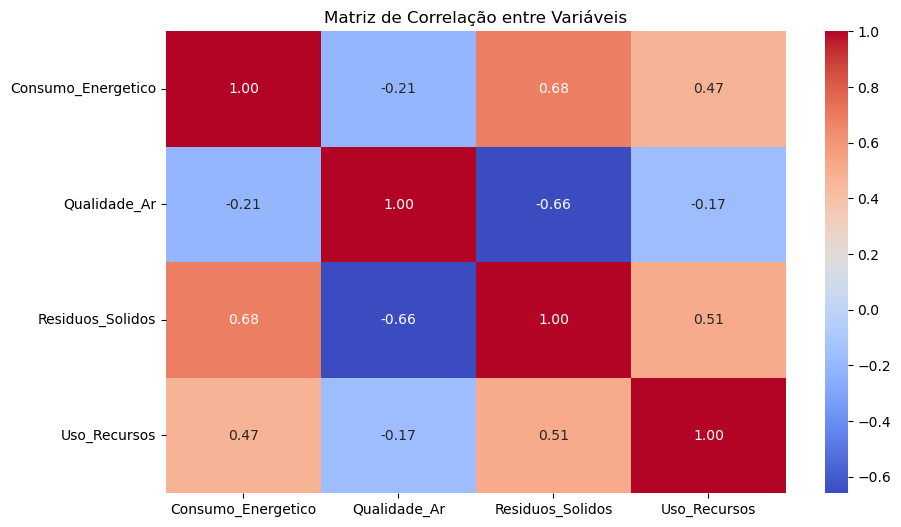

In [ ]:

# Estatísticas descritivas
estatistica = df.describe()
print("\nEstatísticas Descritivas:")
display(estatistica.round(2))




In [ ]:
# Função para calcular os limites inferior e superior com base no IQR
def calcular_limites(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Função para detectar outliers
def detectar_outliers(df, colunas):
    outliers = pd.DataFrame()

    # Iterando por cada coluna para calcular limites e detectar outliers
    for coluna in colunas:
        # Ensure df contains the specified columns for outlier detection
        if coluna in df.columns:  
            limite_inferior, limite_superior = calcular_limites(df, coluna)

            # Detectando outliers com base nos limites calculados
            outliers_coluna = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

            # Adicionando os outliers encontrados ao DataFrame final
            outliers = pd.concat([outliers, outliers_coluna])
        else:
            print(f"Column '{coluna}' not found in DataFrame. Skipping outlier detection for this column.")

    # Removendo duplicatas caso um mesmo registro seja outlier em várias colunas
    outliers = outliers.drop_duplicates()

    # Retornando apenas as colunas de interesse, garantindo que não haja erro se estiver vazio
    return outliers[colunas] if not outliers.empty else pd.DataFrame(columns=colunas)

# Definindo as colunas para análise
colunas_para_checar = ['Consumo_Energetico', 'Qualidade_Ar', 'Residuos_Solidos', 'Uso_Recursos']

# Detectando outliers
outliers = detectar_outliers(df, colunas_para_checar)

# Exibindo os resultados
if outliers.empty:
    print("Não foram encontrados outliers.")
else:
    print("Foram encontrados os seguintes outliers:")
    print(outliers)

Não foram encontrados outliers.


In [ ]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior para cada variável
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Exibindo os resultados
resultados = pd.DataFrame({
    "1º Quartil": Q1,
    "3º Quartil": Q3,
    "IQR": IQR,
    "Limite Inferior": limite_inferior,
    "Limite Superior": limite_superior
})

display(resultados)

,1º Quartil,3º Quartil,IQR,Limite Inferior,Limite Superior
Data,2024-04-22 12:00:00,2024-10-07 18:00:00,168 days 06:00:00,2023-08-14 03:00:00,2025-06-17 03:00:00
Consumo_Energetico,1537.5,1700.0,162.5,1293.75,1943.75
Qualidade_Ar,73.75,85.0,11.25,56.875,101.875
Residuos_Solidos,33.75,42.75,9.0,20.25,56.25
Uso_Recursos,523.75,550.0,26.25,484.375,589.375


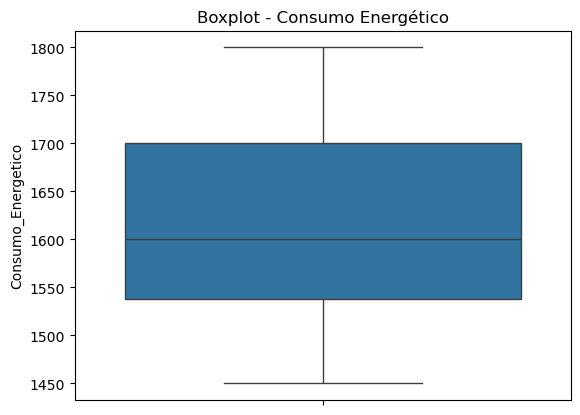

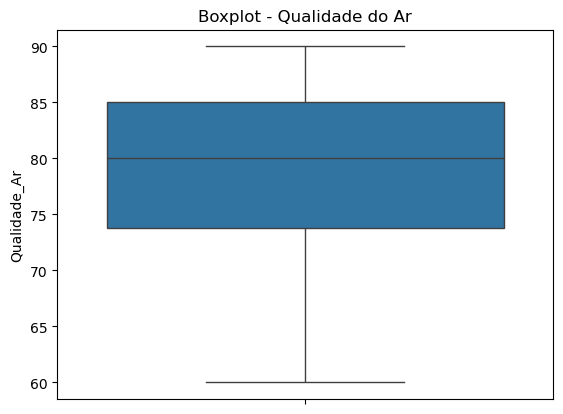

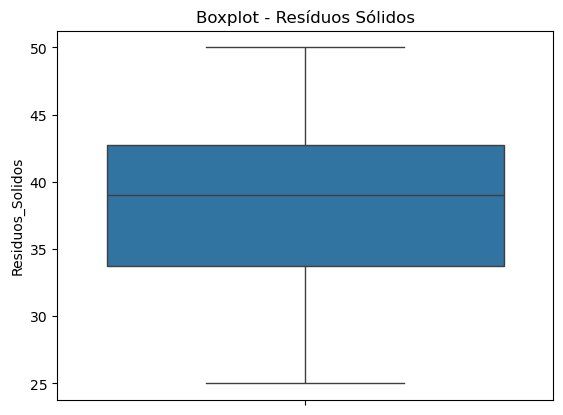

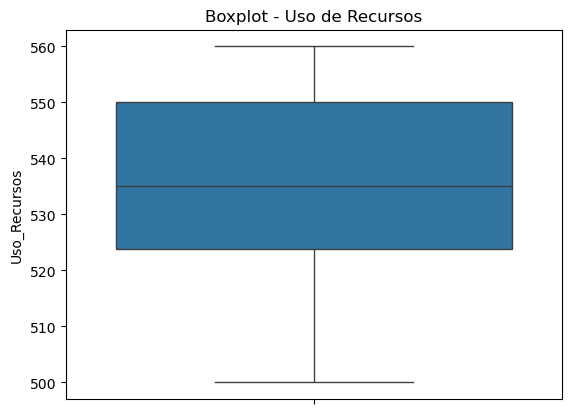

In [ ]:
#Verifação de outliers
sns.boxplot(data=df['Consumo_Energetico'])
plt.title('Boxplot - Consumo Energético')
plt.show()

sns.boxplot(data=df['Qualidade_Ar'])
plt.title('Boxplot - Qualidade do Ar')
plt.show()

sns.boxplot(data=df['Residuos_Solidos'])
plt.title('Boxplot - Resíduos Sólidos')
plt.show()

sns.boxplot(data=df['Uso_Recursos'])
plt.title('Boxplot - Uso de Recursos')
plt.show()

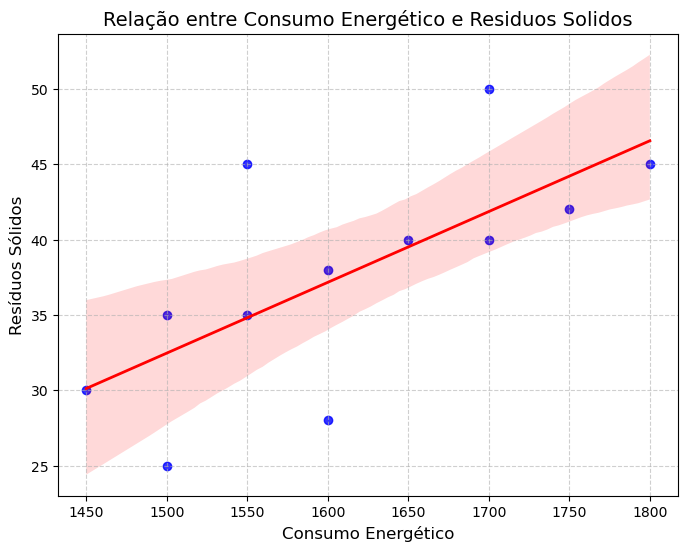

--------------------------------------------------------------------------------------------


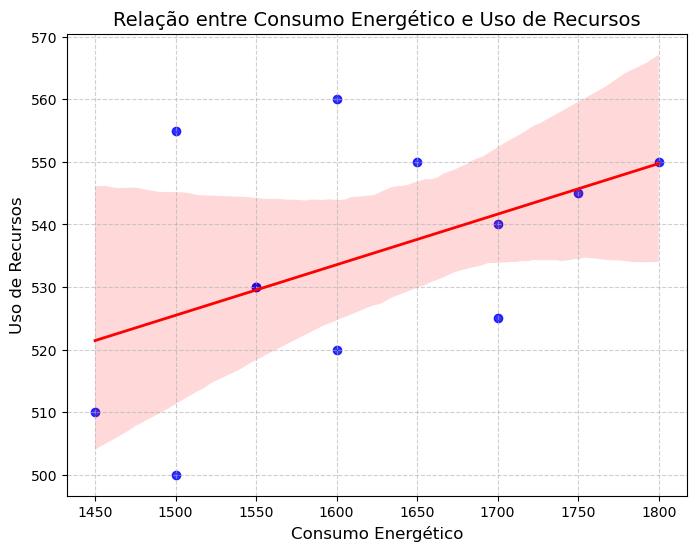

--------------------------------------------------------------------------------------------


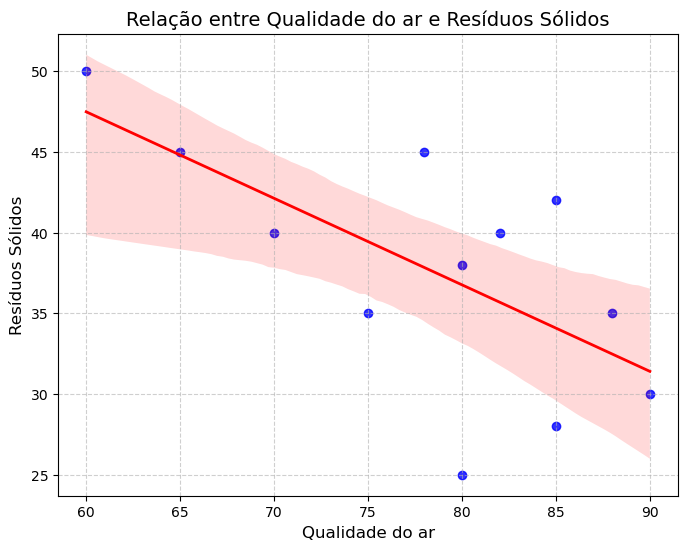

In [ ]:


plt.figure(figsize=(8, 6))

# Gráfico de dispersão
sns.regplot(x=df['Consumo_Energetico'], y=df['Residuos_Solidos'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

# Configurações do gráfico
plt.title('Relação entre Consumo Energético e Residuos Solidos', fontsize=14)
plt.xlabel('Consumo Energético', fontsize=12)
plt.ylabel('Resíduos Sólidos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

print('--------------------------------------------------------------------------------------------')

plt.figure(figsize=(8, 6))

# Gráfico de dispersão com linha de tendência
sns.regplot(x=df['Consumo_Energetico'], y=df['Uso_Recursos'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

# Configurações do gráfico
plt.title('Relação entre Consumo Energético e Uso de Recursos', fontsize=14)
plt.xlabel('Consumo Energético', fontsize=12)
plt.ylabel('Uso de Recursos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


print('--------------------------------------------------------------------------------------------')

plt.figure(figsize=(8, 6))

# Gráfico de dispersão com linha de tendência
sns.regplot(x=df['Qualidade_Ar'], y=df['Residuos_Solidos'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

# Configurações do gráfico
plt.title('Relação entre Qualidade do ar e Resíduos Sólidos', fontsize=14)
plt.xlabel('Qualidade do ar', fontsize=12)
plt.ylabel('Resíduos Sólidos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


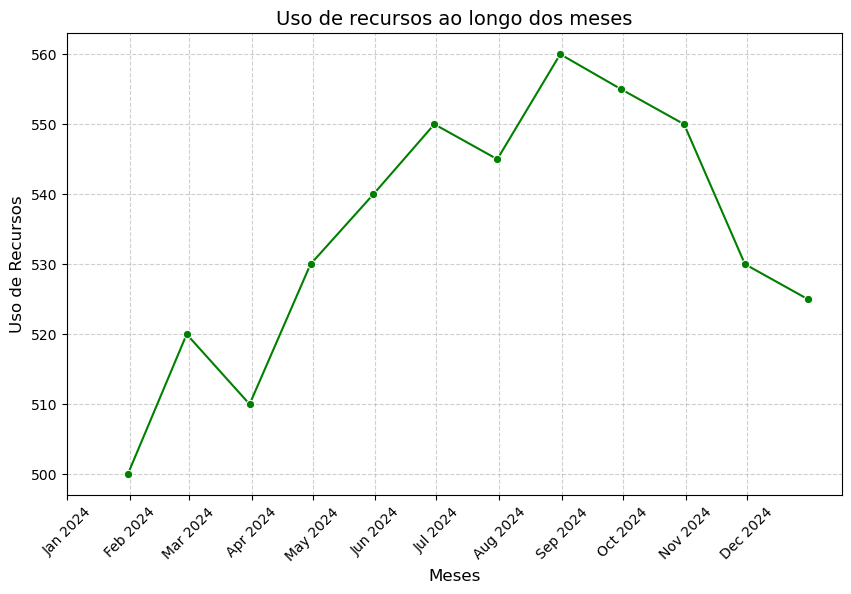

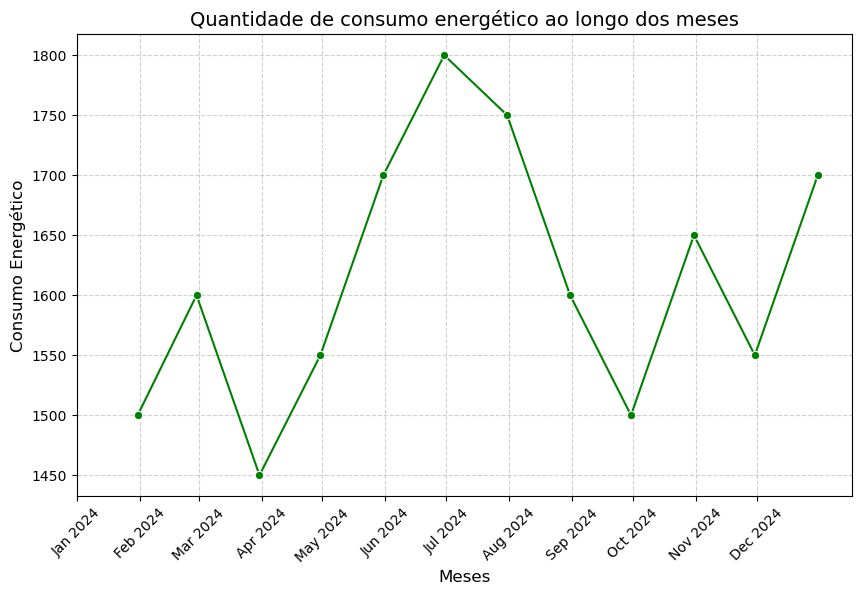

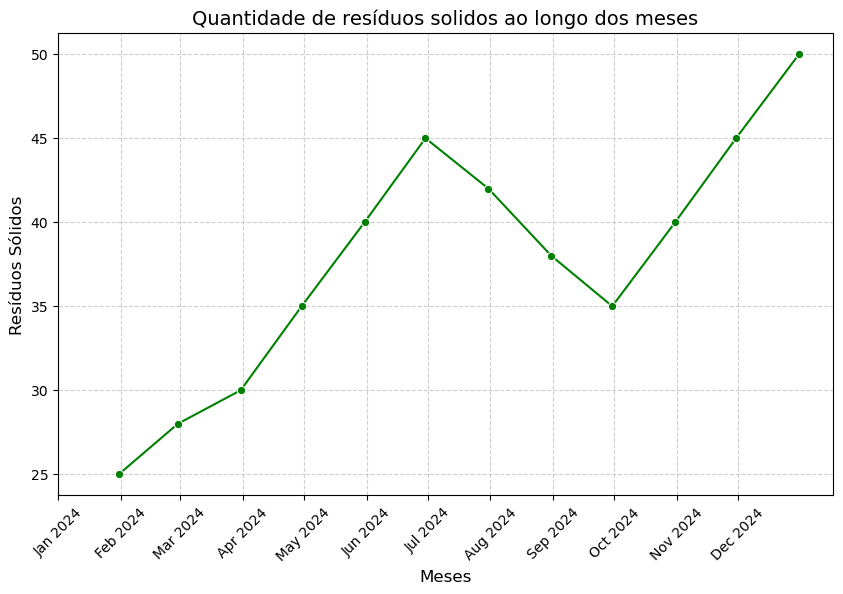

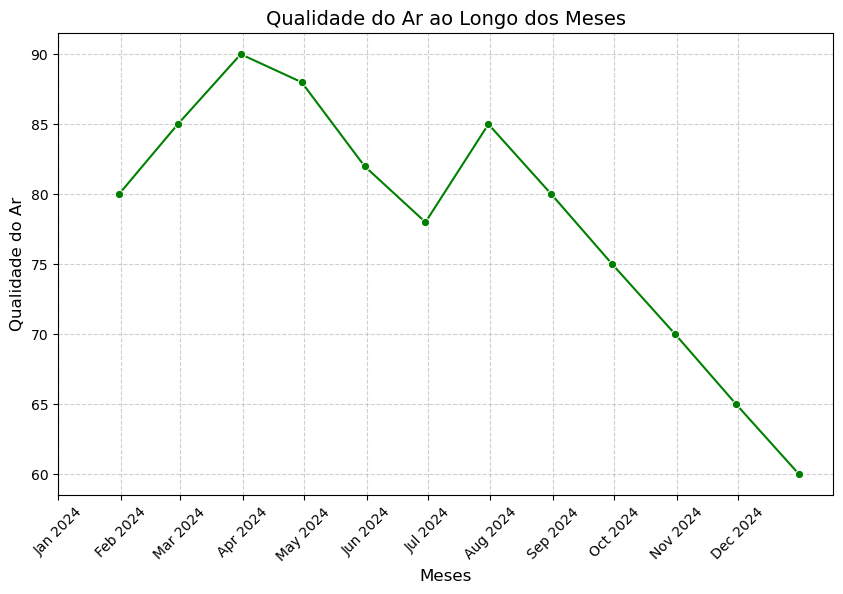

In [ ]:

# Ordenar os dados por data
df = df.sort_values(by='Data')

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))

sns.lineplot(x=df['Data'], y=df['Qualidade_Ar'], marker='o', color='green')

# Configurar o eixo x para mostrar todos os meses, mesmo os sem dados
plt.xticks(all_months, labels=all_months.strftime('%b %Y'), rotation=45)

# Configurações do gráfico
plt.title('Qualidade do Ar ao Longo dos Meses', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Qualidade do Ar', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()


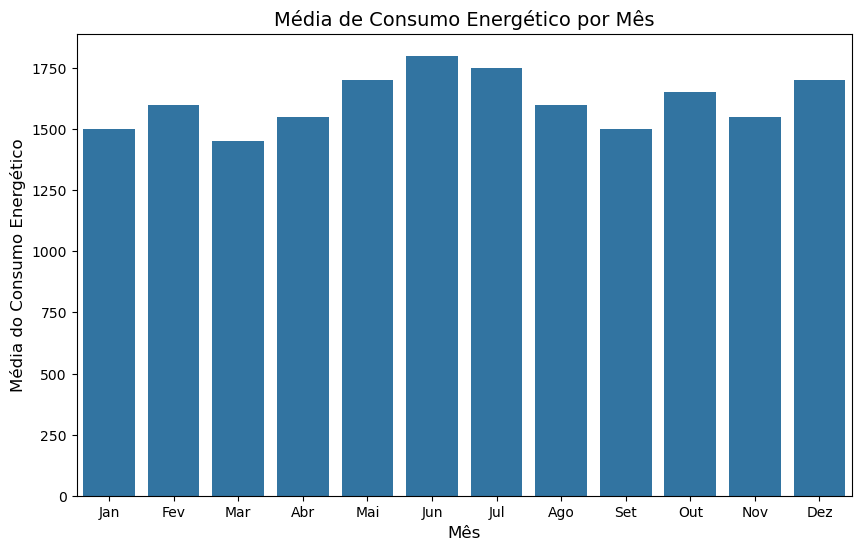

---------------------------------------------------------------------------------------------------------


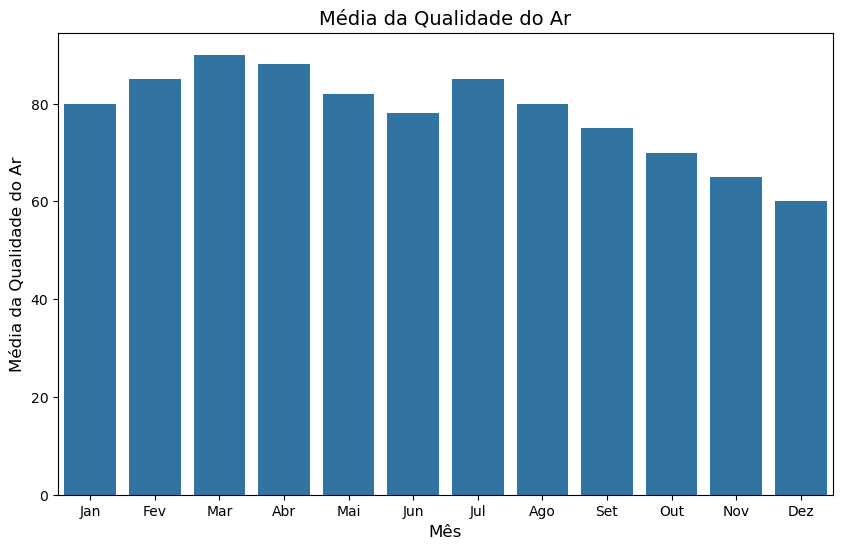

---------------------------------------------------------------------------------------------------------


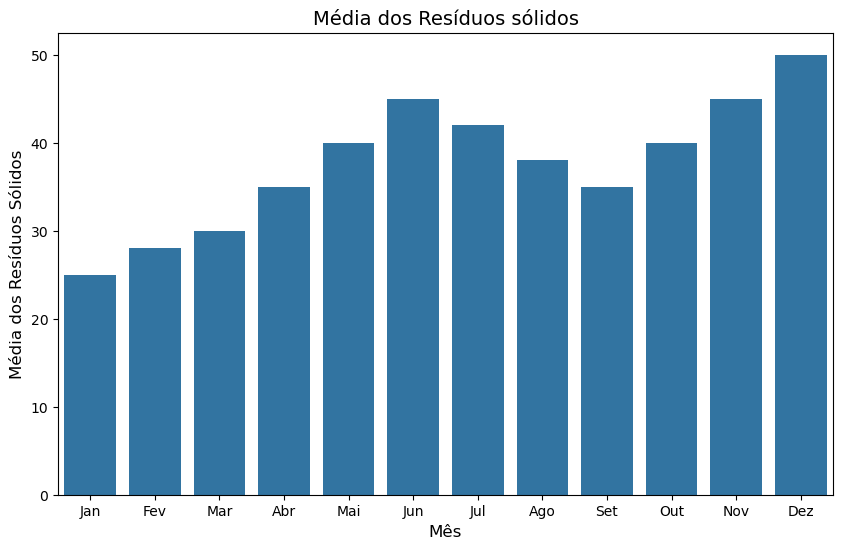

---------------------------------------------------------------------------------------------------------


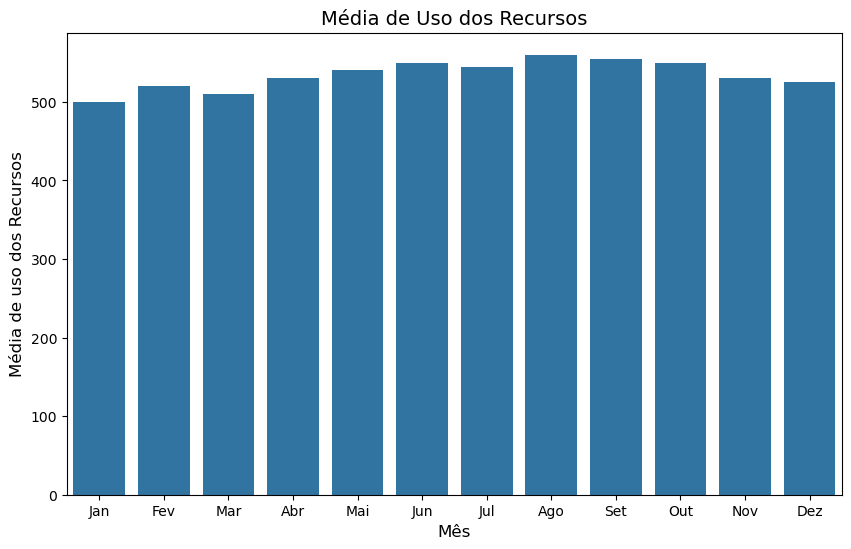

---------------------------------------------------------------------------------------------------------


In [ ]:


# Agrupar os dados por mês e calcular a média do Consumo Energético por mês
df['Mes'] = df['Data'].dt.month  # Extrair o mês
media_consumo_mensal = df.groupby('Mes')['Consumo_Energetico'].mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=media_consumo_mensal.index, y=media_consumo_mensal.values, color='royalblue')

# Adicionando os valores no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Formata para 1 casa decimal
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Configurações do gráfico
plt.title('Média de Consumo Energético por Mês', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média do Consumo Energético', fontsize=12)

# Ajuste correto para os rótulos do eixo X
plt.xticks(ticks=media_consumo_mensal.index - 1,  # Subtrai 1 para alinhar corretamente
           labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Exibir o gráfico
plt.show()


print('---------------------------------------------------------------------------------------------------------')


# Agrupar os dados por mês e calcular a média do Consumo Energético por mês
df['Mes'] = df['Data'].dt.month  # Extrair o mês
media_consumo_mensal = df.groupby('Mes')['Qualidade_Ar'].mean()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=media_consumo_mensal.index, y=media_consumo_mensal.values)

# Configurações do gráfico
plt.title('Média da Qualidade do Ar', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média da Qualidade do Ar', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# exibindo o gráfico
plt.show()

print('---------------------------------------------------------------------------------------------------------')

# Agrupar os dados por mês e calcular a média do Consumo Energético por mês
df['Mes'] = df['Data'].dt.month  # Extrair o mês
media_consumo_mensal = df.groupby('Mes')['Residuos_Solidos'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=media_consumo_mensal.index, y=media_consumo_mensal.values)

# Configurações do gráfico
plt.title('Média dos Resíduos sólidos', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média dos Resíduos Sólidos', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# exibindo o gráfico
plt.show()

print('---------------------------------------------------------------------------------------------------------')

# Agrupar os dados por mês e calcular a média do Consumo Energético por mês
df['Mes'] = df['Data'].dt.month  # Extrair o mês
media_consumo_mensal = df.groupby('Mes')['Uso_Recursos'].mean()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=media_consumo_mensal.index, y=media_consumo_mensal.values)

# Configurações do gráfico
plt.title('Média de Uso dos Recursos', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média de uso dos Recursos', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# exibindo o gráfico
plt.show()

print('---------------------------------------------------------------------------------------------------------')